In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
master_run = '15795'
survey_data_folder_path = r'C:\Users\vaish\dsvv_atomionics\Survey_Data' # survey data folder path
experiment_id = '011_001'
data_file_path = os.path.join(survey_data_folder_path, experiment_id, 'raw_data', master_run, 'data0.pkl')
data = pd.DataFrame(pd.read_pickle(data_file_path), columns=['APD', 'CA+', 'CA-', 'Trigger'])
print(data.shape)

(33240000, 4)


In [4]:
columns = ["APD", "CA+", "CA-", "Trigger"]

for column in columns:
    unique_count = data[column].nunique()
    null_count = data[column].isnull().sum()
    print(f'unique {column} values count: {unique_count}')
    print(f'null {column} values count: {null_count}')


unique APD values count: 1059
null APD values count: 0
unique CA+ values count: 4858
null CA+ values count: 0
unique CA- values count: 3609
null CA- values count: 0
unique Trigger values count: 280
null Trigger values count: 0


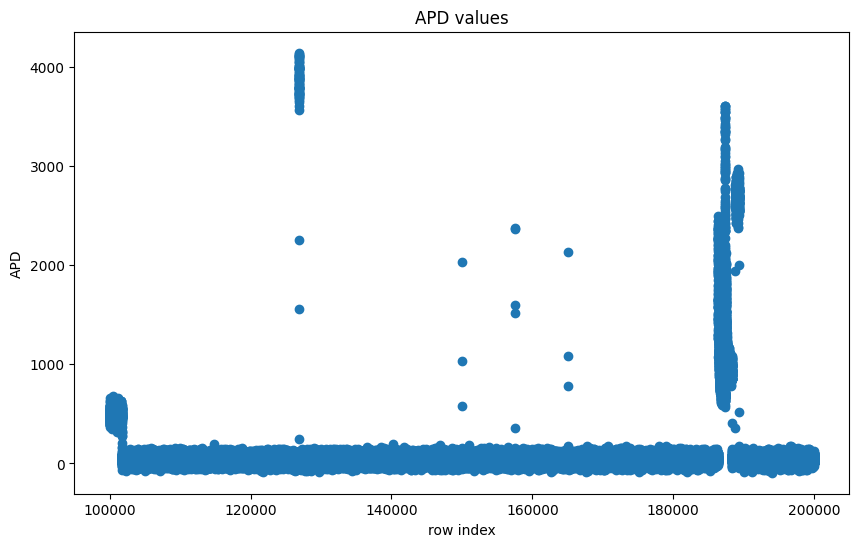

In [34]:
starting_index = 100000
subset_size = 100000
subset = data.iloc[starting_index: starting_index + subset_size]

plt.figure(figsize=(10, 6))
plt.plot(subset.index, subset['APD'], 'o')
plt.xlabel('row index')
plt.ylabel('APD')
plt.title('APD values')
plt.show()


Threshold: 1848.0917748441311
     Range   Index
52    4216  126000
53    4204  126500
99    2084  149500
100   2084  150000
114   2439  157000
115   2439  157500
129   2189  164500
130   2189  165000
171   2532  185500
172   2512  186000
173   3033  186500
174   3033  187000
176   2965  188000
177   3013  188500
178   3021  189000


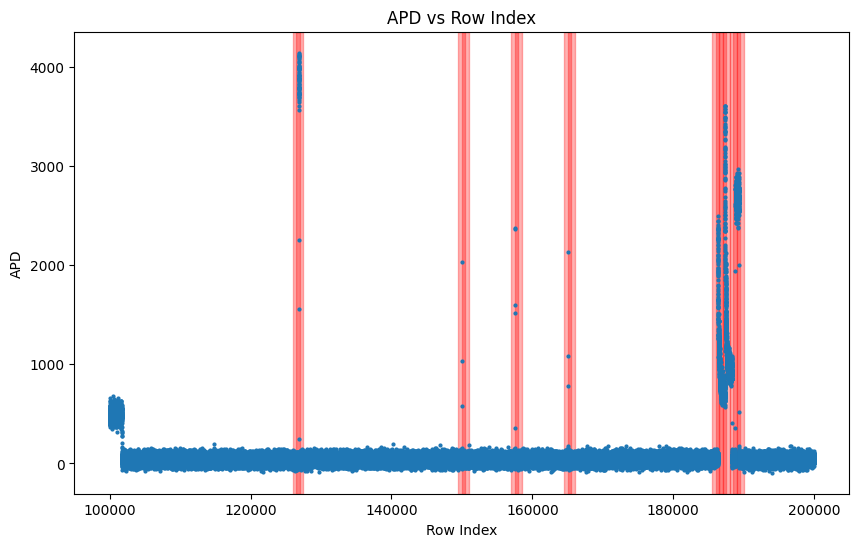

[126000, 126500, 149500, 150000, 157000, 157500, 164500, 165000, 185500, 186000, 186500, 187000, 188000, 188500, 189000]


In [36]:
# Parameters
window_size = 1000  # Size of the sliding window
step_size = 500  # Step size for the sliding window

# Calculate the range within each sliding window
ranges = [subset['APD'].iloc[i:i+window_size].max() - subset['APD'].iloc[i:i+window_size].min()
          for i in range(0, len(subset) - window_size, step_size)]

# Convert ranges to a DataFrame for easy handling
range_df = pd.DataFrame(ranges, columns=['Range'])
# Add the starting index of the current window
range_df['Index'] = starting_index + range_df.index * step_size

# Identify windows with the highest ranges
threshold = range_df['Range'].mean() + 2 * range_df['Range'].std()
print(f'Threshold: {threshold}')

high_range_windows = range_df[range_df['Range'] > threshold]
print(high_range_windows)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(subset.index, subset['APD'], 'o', markersize=2)
plt.xlabel('Row Index')
plt.ylabel('APD')
plt.title('APD vs Row Index')

# Highlight high range windows
for i in high_range_windows['Index']:
    plt.axvspan(i, i + window_size, color='red', alpha=0.3)

plt.show()

# Output high range window indices
print(high_range_windows['Index'].to_list())